## Customer Segmentation Using K-Means Clustering Model

### Dataset: Mall Customer Dataset (Source: Kagge.com)
Customer segmentation is a critical task in data science that involves grouping customers into distinct categories based on their behaviors, characteristics, and preferences. One of the most popular techniques for customer segmentation is the K-MEANS clustering model, which is an unsupervised machine learning algorithm that groups similar customers together based on their similarity in features such as purchase history, demographic data, and other relevant data.

K-MEANS clustering is a powerful tool for discovering patterns and trends in large datasets, enabling businesses to identify hidden insights and opportunities that can inform targeted marketing strategies and product recommendations. The algorithm uses an iterative approach to minimize the sum of distances between data points and centroids, resulting in optimal clusters that represent distinct customer segments.

By using K-MEANS clustering for customer segmentation, businesses can gain a better understanding of their customers and tailor their offerings to meet their specific needs and preferences, ultimately leading to increased customer satisfaction and loyalty.

### Description of the Attributes

Customer ID: A unique identifier for each customer in the dataset.

Gender: The gender of the customer, which may be either male or female.

Age: The age of the customer, typically ranging from 18 to 70 years.

Annual Income (in thousands): The annual income of the customer, measured in thousands of dollars.

Spending Score (1-100): A score assigned to each customer based on their spending habits and purchasing behavior at the mall, with higher scores indicating higher spending levels.


### Import necessary libraries

In [3]:
import numpy as np # for numerical computing 
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
from sklearn.cluster import KMeans # for kmeans cluster
from sklearn.preprocessing import StandardScaler # for data preprocessing
import plotly.express as px # for advanced data visulaization
import joblib # for model saving

#### Loading in the dataset into dataframe

In [5]:
data=pd.read_csv(r"C:\Users\hp\Desktop\Python_data\Mall_Customers.csv")
data.sample(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
104,105,Male,49,62,56
137,138,Male,32,73,73
89,90,Female,50,58,46


#### inspecting the dataframe

In [13]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [15]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data=data.rename(columns={'Genre':'Gender'})

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### kmeans clustering

In [21]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [23]:
# select column we want to use for clustering 
# i want to use Annual Income (k$), Spending Score (1-100)

X=data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [25]:
X.sample(5)

,Annual Income (k$),Spending Score (1-100)
76,54,53
190,103,23
47,40,47
41,38,92
90,59,55


In [27]:
# standardize the dataset using StandardScaler
# scaler = StandardScaler()
# X_scaled=scaler.fit_transform(X)

In [29]:
# Create kmeans object with desired number of cluster
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [31]:
# initialize empty list to store  WCSS values for each number of clusters
wcss=[]

# loop through different numbers of clusters and calculate wcss for each
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

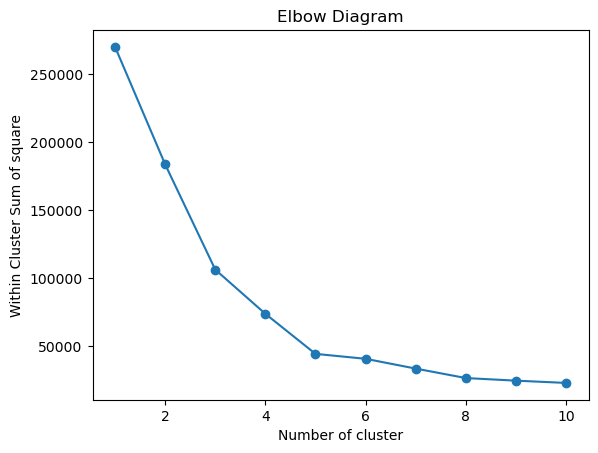

In [33]:
x= range(1, 11)
y=wcss
plt.plot(x, y, marker='o')
plt.title('Elbow Diagram')
plt.xlabel('Number of cluster')
plt.ylabel('Within Cluster Sum of square')
plt.show();

### The optimalCluster 5

In [36]:
optimalCluster =5

## Training the model

In [39]:
X=data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [41]:
# ## standardize the dataset using StandardScaler
# scaler = StandardScaler()
# X_scaled_train=scaler.fit_transform(X)

In [43]:
# Create a kmeans object with optimal cluster
kmeans= KMeans(n_clusters=optimalCluster, init ='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [55]:
# # Make a dataframe for the scaled data
column=X.columns
X= pd.DataFrame(X, columns = column)

In [57]:
# add cluster to the data frame
X['Clusters']=y_kmeans

In [59]:
X

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


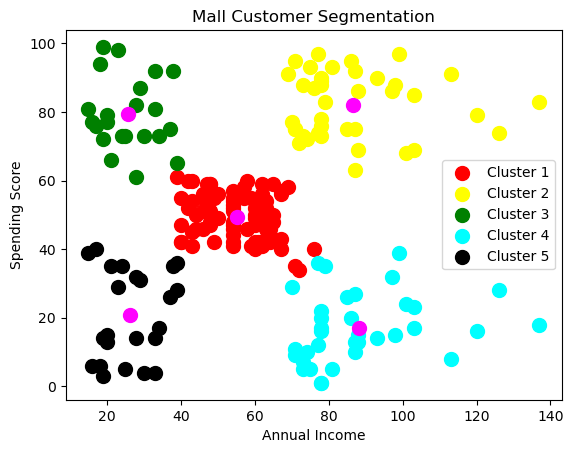

<Figure size 1500x1200 with 0 Axes>

In [61]:
# Visualize the adta

import seaborn as sns

# x='Annual Income (k$)'
# y='Spending Score (1-100)'
# plt.figsize=(10,7)

# sns.scatterplot(data=X, x=x, y=y, hue='Clusters')
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = "Cluster 1")
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'yellow', label = "Cluster 2")
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = "Cluster 3")
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = "Cluster 4")
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s = 100, c = 'black', label = "Cluster 5")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'magenta')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Mall Customer Segmentation")
plt.legend()
plt.figure (figsize=(15, 12))
plt.show();

In [65]:
kmeans.predict([[10, 12]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])

### Save the model

In [70]:
joblib.dump(kmeans, "Mail Customer Segmentation")

['Mail Customer Segmentation']

In [74]:
# to load the saved model

model= joblib.load("Mail Customer Segmentation")

In [98]:
model.predict([[65,32]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

#### Conclusion

In this project, I utilized the popular mall customers dataset to train a K-means clustering model focused on two key variables: spending score and annual income. The model's performance was evaluated through metrics such as the silhouette score and elbow method.

The K-means clustering model successfully identified 5 distinct customer segments based on spending behaviors and income levels. Key insights highlighted that spending score and annual income are the primary drivers of customer segmentation.

The model’s implications are significant, as it enables tailored marketing strategies for each segment. For instance, high-income, high-spending customers can be targeted with premium offerings and personalized promotions, while lower-income, lower-spending customers may be more responsive to budget-friendly products and discounts.

In summary, the K-means clustering model demonstrated strong segmentation accuracy, revealing 5 unique customer clusters. These insights provide valuable guidance for targeted marketing and strategic decision-making. Future work should focus on validating the model with a broader and more varied dataset to enhance its reliability
